# Heirarchical Models
In this tutorial we will use the same data and some functions from the centroid-models walkthrough. Let's start with the generation of the data and definition of **plot_clusters** function.

In [1]:
# Import Libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Generate Clusters
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)

def plot_clusters(X, y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
    
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

### Heirarchical Clustering
This is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This heirarchy of clusters is represented as a tree (or a dendogram). The root of the tree is the unique cluster that gathers all the samples, with the leaves being clusters with only one sample. 
<br>
<br> We will focus on **Agglomerative clustering**. It performs a heirarchical clustering using a bottom up approach: each observation starts in its own cluster, and the clusters are successively merged together. 
<br>
<br> Let's begin by importing the necessary libraries:

In [4]:
# Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# Cluster Hierarchy
import scipy.cluster.hierarchy as sch

The next step is to create an object from the **AgglomerativeClustering** class:

In [5]:
# Create an object
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters=3)

In this object, we set the 'euclidean' distance to the **affinity** parameter and set the number of clusters to 3. We set the **linkage** parameter to the "ward". These linage criteria determine the metric used for the merge strategy:
* **ward**: minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and, in this sense, is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

* **maximum**: complete linkage minimizes the maximum distance between observations of pairs of clusters.

* **average**: linkage minimizes the average of the distances between all observations of pairs of clusters.

* **single** linkage minimizes the distance between the closest observations of pairs of clusters.

In [6]:
# Fit and predict the data
y_hc = ac.fit_predict(X)

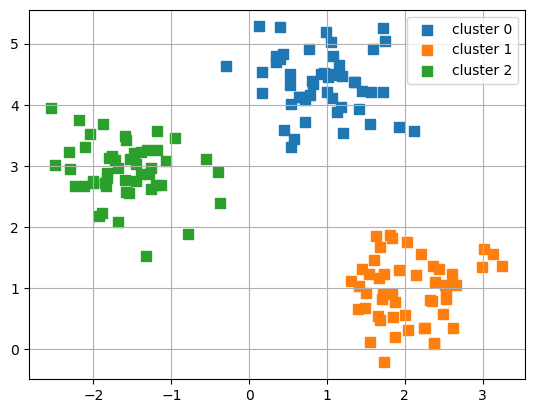

In [7]:
# Plot clustering result
plot_clusters(X, y_hc)

As we can see, there is no difference from **Agglomerative Clustering** and our **K-means** clustering from earlier.
<br>
## Dendrogram
To identify the right number of clusters we can plot a *dendrogram*. Let's define the function that plots a *dendrogram*:

In [8]:
# define plot_dendrogram function
def plot_dendrogram(X, method='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean Distances")
    plt.xlabel("Points")
    plt.show()

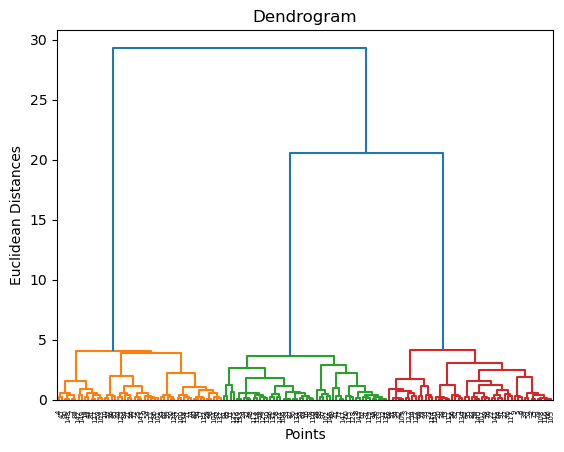

In [9]:
# Plot Dendrogram with our data
plot_dendrogram(X)

We can see from this dendrogram that it is reasonable to set the number of clusters to the value three.